<a href="https://colab.research.google.com/github/chanapacha/sentiment-analysis-baseline-model/blob/main/sentiment_classification_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Requirement

- Positive: It should be wording that be the good word or compliment such as คำที่แสดงความรู้สึกที่ชมเชย, ดีมาก, เยี่ยมยอด, สุดยอด, ขอชม

- Neutral: It should be wording that be the general word or question or answer such as คำถามที่ลูกค้าใช้ถาม, การตอบรับใช่หรือไม่, คำที่แสดงความรู้สึก เช่น เฉยๆ

- Negative: It should be wording that be the rude word or complaint such as คำหยาบต่างๆ เช่น กู, มึง, คำด่า คำว่า เช่น รู้สึกแย่, แย่มาก

# Setup

In [1]:
!pip install -q pythainlp
!pip install -q wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 35.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None) # set the max columns to none
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

In [3]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

# Data Preprocessing

ลบ stopword และ punctuation (เครื่องหมายวรรคตอน) ออกจากข้อความ และทำ tokenize (ตัดคำ) เปลี่ยนข้อความให้มีช่องว่างระหว่างคำ (ให้เหมือนภาษาอังกฤษ)

## Explore Data

In [26]:
df = pd.read_csv('sentiment_demo.csv')

In [ ]:
df.sample(10)

,text,label
1957,คุณนี่ผมรอนานแล้วนะ,neg
736,สินค้าใดบ้างคะที่ร่วมโปรโมชั่นตอนนี้,neu
254,รบกวนขอชื่อร้านขายเสื้อหน่อยได้ไหม,neu
94,อยากทราบว่ามีหน้าร้านไหม,neu
1753,พนักงานบริการไม่ดีเลยอ่ะ,neg
552,สามารถผ่อนชำระเงินได้ป่ะคะ,neu
547,มีหน้าร้านให้ดูหรือเปล่าคะ,neu
1083,พนักงานคนนี้ทำงานได้เยี่ยมจริงๆ รับผิดชอบดีมาก,pos
2218,วัสดุค่อนข้างดีนับว่าคุ้มราคาครับ,pos
2106,บริการภาษาอะไร ช้ามากกก,neg


<Axes: ylabel='label'>

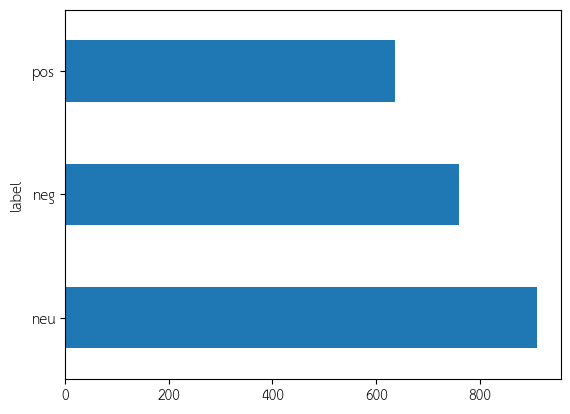

In [ ]:
df['label'].value_counts().plot.barh()

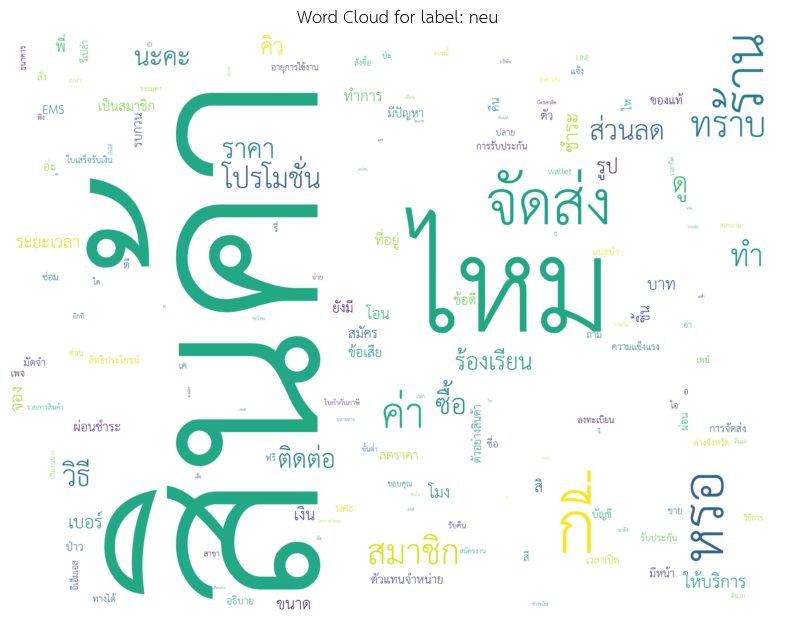

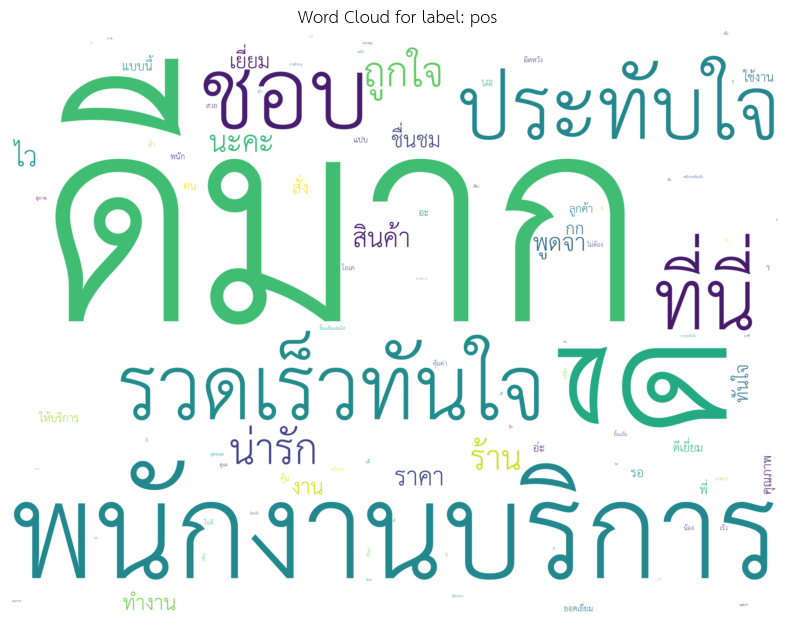

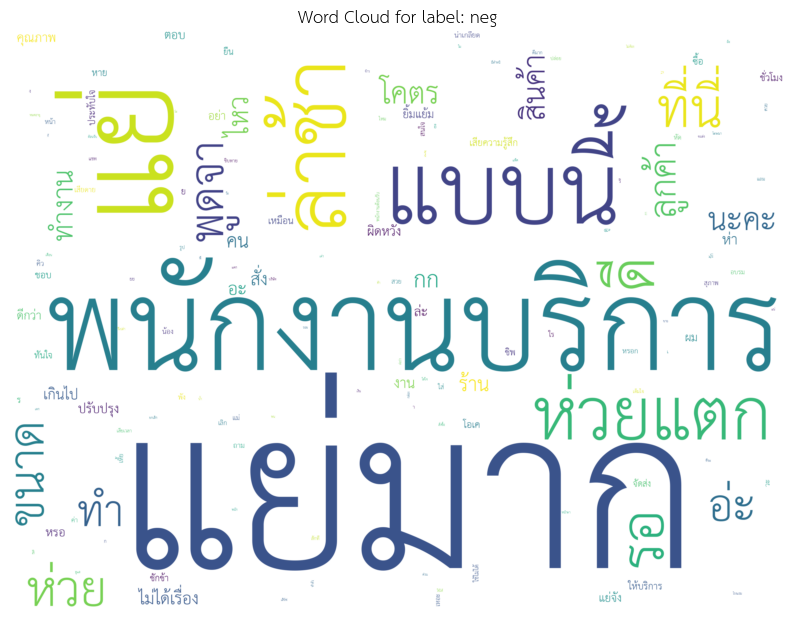

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import common
from pythainlp.corpus import thai_stopwords

stop_word_add = ['บริการ', 'พนักงาน']
# Iterate over unique values in the 'label' column
for label_kind in df['label'].unique():
    # Concatenate text for the current label kind
    text = ' '.join(df[df['label'] == label_kind]['text'])
    text = ' '.join(word_tokenize(text, engine="newmm"))

    # Generate word cloud
    wordcloud = WordCloud(font_path='thsarabunnew-webfont.ttf',
                          stopwords=list(common.thai_stopwords())+stop_word_add,
                          relative_scaling=1.0,
                          min_font_size=4,
                          background_color="white",
                          width=1024,
                          height=768,
                          scale=3,
                          font_step=1,
                          collocations=False,
                          regexp=r"[\u0E00-\u0E7Fa-zA-Z']+",
                          margin=2
                          ).generate(text)

    # Plot word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for label: {label_kind}")
    plt.axis("off")
    plt.show()


## Data Cleansing

In [27]:
df.loc[df['text'] == 'บริการดีมากเลยครับประทับใจ', 'label'] = 'pos'
df.loc[df['text'] == 'พนักงานบริการดีมากเลยง่า', 'label'] = 'pos'
df.loc[df['text'] == 'พนักงานบริการได้ดีมากๆเลยค่ะ', 'label'] = 'pos'

In [28]:
texts_to_update = ['บริการของพนักงานห่วยแตกมากครับ', 'พนักงานบริการสุดยอดไปเลยห่วยแตกมาก']
new_label = 'neg'

# Update the labels in the DataFrame
df.loc[df['text'].isin(texts_to_update), 'label'] = new_label

In [29]:
texts_to_update= ['พนักงานบริการดีมากค่ะให้ความเห็นปรึกษาได้ทุกอย่าง',
 'พนักงานให้บริการดีมาก น่าชื่นชม','พนักงานบริการดีมากกก','งานบริการพนักงานที่นี่บริการดีมากค่ะถูกใจมากเลยค่ะ',
 'พนักงานบริการดีมาก ยิ้มแย้มตลอด', 'พนักงานที่ร้านของคุณบริการดีมากๆเลยนะ', 'พนักงานต้อนรับดีมาก ไม่ต้องให้รอนานเลย', 'ชอบงานบริการมากเลยค่ะดีมากเลย',
 'งานบริการพนักงานเยี่ยมมากขายดีมากเลย', 'พนักงานบริการได้ดีมากๆพูดจาเพราะมากเลยครับ', 'การบริการของพนักงานที่นี่ดีมากค่ะ',
 'บริการพนักงานที่นี่ดีมากบริการยอดเยี่ยมเลย', 'พนักงานบริการได้ดีมาก ยิ้มเก่ง สวยมากก']
new_label = 'pos'

# Update the labels in the DataFrame
df.loc[df['text'].isin(texts_to_update), 'label'] = new_label

In [30]:
indices_to_change = [1499, 1502, 1537, 1741, 1804, 1532, 1821, 277, 374, 799]
new_values = ['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos']

# Change the values in the label column at the specified indices
df.loc[indices_to_change, 'label'] = new_values

In [31]:
df = df.drop_duplicates()

## Word Tokenize


In [166]:
import re
import pandas as pd
import numpy as np
from pythainlp.corpus.common import thai_words
from pythainlp import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer, FunctionTransformer, LabelEncoder
from sklearn.svm import LinearSVC
import pickle

# Load the data
pos_df = pd.read_csv('pos_words.txt', header=None, names=['text'])
neg_df = pd.read_csv('neg_words.txt', header=None, names=['text'])
bad_df = pd.read_csv('bad_words.txt', header=None, names=['text'])


toxic_words = neg_df.values.flatten()
positive_word = pos_df.values.flatten()
bad_words = bad_df.values.flatten()
words = set(thai_words())  # thai_words() returns frozenset

# update word in thai_words
words.update(toxic_words)
words.update(positive_word)
words.add('ไม่ดี')

# Define the Thai stopwords
stop_words = ['ครับ', 'ค่ะ', 'คะ', 'ครับผม', 'เจ้าค่ะ', 'จ้ะ', 'จ้า']

# update word tokenizer
custom_tokenizer = Tokenizer(words)

def custom_token(text):
    # tokenization logic
    tokens = custom_tokenizer.word_tokenize(text)
    return tokens

def clean_text(text):
    text = re.sub(r'[^\u0E00-\u0E7Fa-zA-Z0-9\s]', '', text)  # remove special characters and emojis
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = re.sub(r':[a-z_]+:', '', text)  # remove all emoji
    text = text.strip()  # remove leading and trailing whitespace
    return text

def tokenize(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_token(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split()
                     if word.lower() not in stop_words)
    return final

In [114]:
custom_token('บริการไม่ดีเลยอ่ะ')

['บริการ', 'ไม่ดี', 'เลย', 'อ่ะ']

In [167]:
dat = df.copy()

In [168]:
dat["tokens"] = dat["text"].apply(clean_text)
dat = dat[dat['tokens'].str.len() != 0]
dat = dat[dat['label'].str.len() != 0]
dat['tokens'] = dat['text'].apply(tokenize)

In [ ]:
dat.sample(5)

,text,label,tokens
1665,พนักงานบริการแย่มากพูดจาก็ไม่เพราะ,neg,พนักงานบริการ แย่มาก พูดจา ก็ ไม่ เพราะ
1230,บริการได้รวดเร็วทันใจดีมากๆเลยครับ,pos,บริการ ได้ รวดเร็วทันใจ ดีมาก เลย
2008,บริการช้ามากๆเลย,neg,บริการ ช้า มาก เลย
307,จัดส่งด่วนที่สุดได้ไหม,neu,จัดส่ง ด่วน ที่สุด ได้ ไหม
1840,บริการโคตรช้าแย่มากๆ,neg,บริการ โคตร ช้า แย่มาก


# Feature Engineering

## Train Test Split

In [169]:
feat = dat.tokens
label = dat.label

In [170]:
# Split the data into training, validation, and test sets (80%, 20%)
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.2, random_state=42, stratify=label)

## Label encoding

In [119]:
from sklearn import preprocessing
# Initialize LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['neg','neu','pos'])
# Fit LabelEncoder on training labels and transform all sets
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# If needed, you can inverse transform the encoded labels back to original strings
# y_train_decoded = label_encoder.inverse_transform(y_train_encoded)
# y_test_decoded = label_encoder.inverse_transform(y_test_encoded)

In [120]:
import joblib
# Save label encoder
joblib.dump(label_encoder, 'label_encoded.pkl')

['label_encoded.pkl']

## Word Vectorization

ใช้ TfidfVectorizer ของ sklearn มาช่วยในการจัดการดึงคำทั้งหมดออกมาจากข้อความ convert จาก text เป็น numberical จัดเก็บในรูปแบบ Vector

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer
def split_fn(x):
    return x.split(' ')
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(analyzer=split_fn, ngram_range=(1,2))

# Fit and transform the training data
tfidf_vectorizer = tfidf_vectorizer.fit(X_train)
X_train_tfidf = tfidf_vectorizer.transform(X_train)

# Transform the validation and test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [153]:
tfidf_array = np.array(X_train_tfidf.todense())

#แปลงเป็น DataFrame เพื่อง่ายแก่การอ่าน
tfidf_df = pd.DataFrame(tfidf_array,columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

%    0    1   10    3    4    5  EMS   ID  Instagram  LINE  Line   OK  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...        ...   ...   ...  ...   
1840  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
1841  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
1842  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
1843  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   
1844  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0   0.0   0.0  0.0   

      Pages  True  Wallet  email  ems   id   ig  line  promptpay  wallet    ก  \
0       0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
1       0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
2       0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
3       0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
4       0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
...     ...   ...     ...    ...  ...  ...  ...   ...        ...     ...  ...   
1840    0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
1841    0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
1842    0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
1843    0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   
1844    0.0   0.0     0.0    0.0  0.0  0.0  0.0   0.0        0.0     0.0  0.0   

       กก   กด  กรอ  กระพริบตา  กระเป๋า  กรุงเทพ  กรุณา  กร้าน   กล  กลับ  \
0     0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
1     0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
2     0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
3     0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
4     0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
...   ...  ...  ...        ...      ...      ...    ...    ...  ...   ...   
1840  0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
1841  0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
1842  0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
1843  0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   
1844  0.0  0.0  0.0        0.0      0.0      0.0    0.0    0.0  0.0   0.0   

      กลับมา  กลา  กลิ่น  กล่อง  กวน  กว่า   กะ  กัน       กับ   กา  กางเกง  \
0        0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
1        0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.341358  0.0     0.0   
2        0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
3        0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
4        0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
...      ...  ...    ...    ...  ...   ...  ...  ...       ...  ...     ...   
1840     0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
1841     0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
1842     0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
1843     0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   
1844     0.0  0.0    0.0    0.0  0.0   0.0  0.0  0.0  0.000000  0.0     0.0   

           การ  การกระทำ  การขนส่ง  การจัดส่ง  การตอน  การทำงาน  การพิสูจน์  \
0     0.000000       0.0       0.0        0.0     0.0       0.0         0.0   
1     0.240444       0.0      

In [197]:
# Save the encoding transformer
joblib.dump(tfidf_vectorizer, 'transform.pkl')

['transform.pkl']

# Model Training (baseline model)

In [198]:
%%time
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
# Initialize and train the model
model = LinearSVC(random_state=42)
model.fit(X_train_tfidf, y_train_encoded)


CPU times: user 13.2 ms, sys: 0 ns, total: 13.2 ms
Wall time: 13.2 ms


LinearSVC(random_state=42)

In [199]:
# Save the trained sentiment model
joblib.dump(model, 'model.pkl')

['model.pkl']

In [200]:
# Make predictions on validation data
y_pred = model.predict(X_test_tfidf)

# Model Evaluation

LinearSVC
              precision    recall  f1-score   support

         neg       0.97      0.97      0.97       151
         neu       0.99      0.99      0.99       182
         pos       0.98      0.97      0.97       129

    accuracy                           0.98       462
   macro avg       0.98      0.98      0.98       462
weighted avg       0.98      0.98      0.98       462



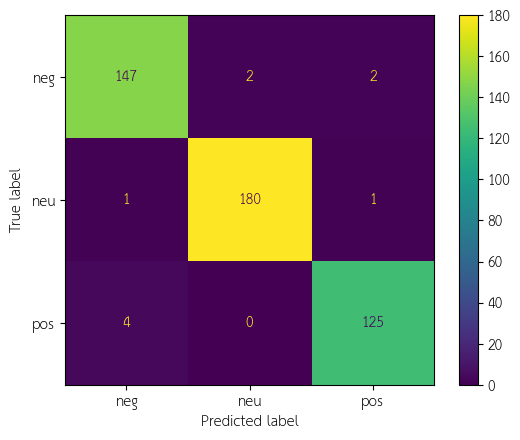

In [201]:
from sklearn.preprocessing import LabelEncoder
# Invert the label encoding for validation labels
y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_test_original = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print('LinearSVC')
print(classification_report(y_test_original, y_pred_test_original))

# Display the confusion matrix
cm = confusion_matrix(y_test_original, y_pred_test_original, labels=label_encoder.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()

ก่อน clean data แก้ไข label ให้ถูกต้องได้ Accuracy 93%

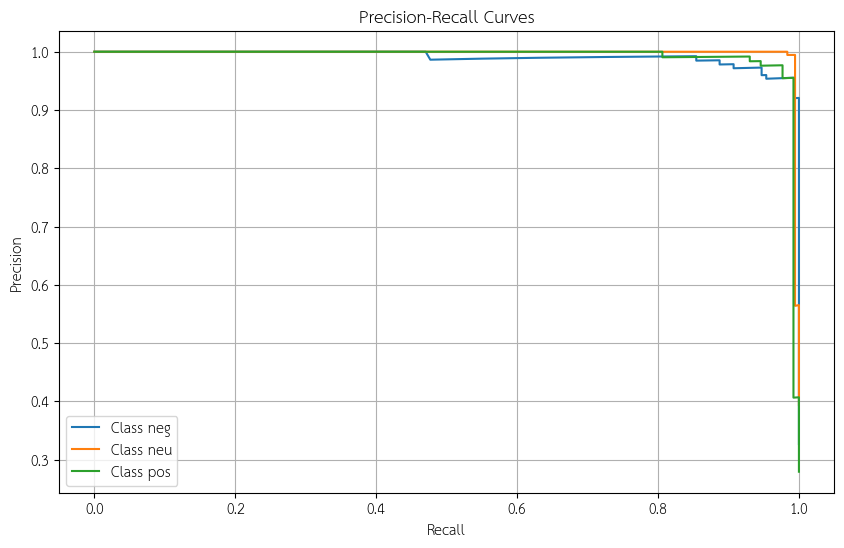

In [202]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Get the number of classes
n_classes = np.unique(y_train_encoded).size

# Define labels for each class
class_labels = label_encoder.inverse_transform(range(n_classes))

# Plot precision-recall curves for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    y_test_binary = (y_test_encoded == i).astype(int)
    y_score = model.decision_function(X_test_tfidf)[:, i]  # Use decision_function for LinearSVC
    precision, recall, _ = precision_recall_curve(y_test_binary, y_score)
    plt.plot(recall, precision, label=f"Class {class_labels[i]}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()


In [203]:
# Combine the val data with the predicted labels
val_df = pd.DataFrame({'text': X_test, 'true_label': y_test, 'predicted_label': y_pred_test_original})

In [204]:
val_df[val_df['true_label']!=val_df['predicted_label']]

,text,true_label,predicted_label
1949,การทำงาน บริการ บริการ ราช บรรณาการ,neg,pos
2268,หลอกลวง ต้มตุ๋น เอา ของปลอม มา ขาย ร้าน โจร,neg,neu
2279,เกรด ต่ำ เหมือนกับ ว่า เอา ของ ถูก มา คละ กัน,neg,pos
555,เมื่อไหร่ จะ ไม่ ทิ้ง เค้า เนี่ย,neu,neg
1446,ยืน รอ ไม่ นาน เลย แปบ เดียว ได้ อาหาร แล้ว นะ,pos,neg
1178,พนักงานบริการ ได้ แย่มาก,pos,neg
2229,ใส่ สบาย สั่ง หลาย รอบ แล้ว จ ร้า าา,pos,neg
1403,บริการ ส่ง ของ รถ แล้ว ได้ใจ ไป เลย,pos,neg
2300,มัน ผิดพลาด อะไร หรือ ลง รูป เพื่อ หลอก ให้ คน...,neg,neu
289,ขอบพระคุณ มาก,neu,pos


## Threshold confidence

In [205]:
from sklearn.metrics import f1_score

def threshold_optimizer(y_true, y_prob, num_classes, num_thresholds=100):
    thresholds = np.linspace(0, 1, num_thresholds)
    optimal_thresholds = np.zeros(num_classes)
    max_f1_scores = np.zeros(num_classes)

    for i, class_probs in enumerate(y_prob.T):
        for threshold in thresholds:
            y_pred = (class_probs >= threshold).astype(int)
            f1 = f1_score(y_true, y_pred, average='macro')

            if f1 > max_f1_scores[i]:
                max_f1_scores[i] = f1
                optimal_thresholds[i] = threshold

    return optimal_thresholds, max_f1_scores

In [ ]:
# Use your model to predict probabilities on the validation set
y_val_prob = model._predict_proba_lr(X_test_tfidf)

# Obtain optimal thresholds
optimal_thresholds, max_f1_scores = threshold_optimizer(y_test_encoded, y_val_prob, num_classes=len(np.unique(y_test_encoded)))

print("Optimal Thresholds:", optimal_thresholds)
print("Max F1 Scores:", max_f1_scores)

In [207]:
np.save('sentiment_optimal_thresholds.npy', optimal_thresholds)

## Test model

In [208]:
bad_words = bad_df.values.flatten()
enc_sentiment = joblib.load('transform.pkl')
sentiment_model = joblib.load('model.pkl')
label_enc_sentiment = joblib.load('label_encoded.pkl')
optimal_threshold_sentiment = np.load('sentiment_optimal_thresholds.npy')

def map_label(y):
    if y == 'pos':
        return 'positive'
    elif y == 'neu':
        return 'neutral'
    else:
        return 'negative'

def check_bad_words(input_text):
    for bad_word in bad_words:
        if bad_word in input_text.split(' '):
            print('------------------------------------')
            return True
    return False

def sentiment_classify(input_text):
    input_text = tokenize(clean_text(input_text))

    if check_bad_words(input_text):
        # ให้ triggered ถ้าเจอคำที่หยาบมากๆ
        return 'negative', 1.0, 'triggered'

    # Transform the input text into TF-IDF representation
    input_tfidf = tfidf_vectorizer.transform([input_text])

    # Predict sentiment label and probability
    y_pred = sentiment_model.predict(input_tfidf)
    probs = sentiment_model._predict_proba_lr(input_tfidf)
    prob = max(probs[0])
    index = np.argmax(probs[0])
    # Convert predicted label index to the original class label
    predicted_label = label_enc_sentiment.inverse_transform([y_pred])[0]
    predicted_label = map_label(predicted_label)  # Convert to human-readable label

    if prob > optimal_threshold_sentiment[index]:
        return predicted_label, prob, 'not triggered'
    else:
        return 'neutral', prob, 'not triggered'

In [209]:
#@title Sentiment Analysis
import ipywidgets as widgets
from IPython.display import display

# Define the sentiment classification function
def classify_sentiment(input_text):
    # Perform sentiment classification
    sentiment_label, probability, status = sentiment_classify(input_text)

    # Print the result
    print("text:", input_text)
    print("Sentiment:", sentiment_label)
    print("Probability:", probability)
    print("Trigger:", status)

# Create a text input widget
input_text_widget = widgets.Text(
    value='บริการห่วยแตกแบบนี้คงจะขายดีแย่เลย',
    description='Input Text:',
    disabled=False
)

# Create a button widget
classify_button = widgets.Button(
    description='Classify Sentiment',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to classify sentiment',
    icon='check'  # (FontAwesome names without the `fa-` prefix)
)

# Define a function to handle button click event
def on_button_click(b):
    input_text = input_text_widget.value
    classify_sentiment(input_text)

# Attach the click event handler to the button
classify_button.on_click(on_button_click)

# Display the widgets
display(input_text_widget)
display(classify_button)


Text(value='บริการห่วยแตกแบบนี้คงจะขายดีแย่เลย', description='Input Text:')

Button(description='Classify Sentiment', icon='check', style=ButtonStyle(), tooltip='Click to classify sentime…

text: บริการห่วยแตกแบบนี้คงจะขายดีแย่เลย
Sentiment: negative
Probability: 0.8181464214637445
Trigger: not triggered
text: บริการดี
Sentiment: positive
Probability: 0.6781200671548763
Trigger: not triggered
text: ชอบการให้บริการของที่นี่
Sentiment: positive
Probability: 0.5578620001265812
Trigger: not triggered
text: ดูแลลูกค้าดีค่ะ
Sentiment: positive
Probability: 0.4625622360545035
Trigger: not triggered
text: ถูกใจที่นี่มากๆนอกจากราคาถูกบริการก็ยังดีอีก
Sentiment: positive
Probability: 0.5626623534873252
Trigger: not triggered
text: ครั้งหน้าจะมาอุดหนุนใหม่นะคะ
Sentiment: neutral
Probability: 0.396900638789365
Trigger: not triggered
text: ดิฉันจะเอาไปร้องเรียนว่าพนักงานที่นี่ทำกริยาไม่ให้เกียรติลูกค้า
Sentiment: negative
Probability: 0.5165190092015233
Trigger: not triggered


# Fit all data

In [210]:
feat = dat.tokens
label = dat.label

In [211]:
# Fit LabelEncoder on training labels
label_encoded = label_encoder.transform(label)

In [214]:
# Fit and transform the training data
tfidf_vectorizer = tfidf_vectorizer.fit(feat)
feat_tfidf = tfidf_vectorizer.transform(feat)

# Save the encoding transformer
joblib.dump(tfidf_vectorizer, 'transform.pkl')

['transform.pkl']

In [215]:
%%time
# Initialize and train the model
model = LinearSVC(random_state=42)
model.fit(feat_tfidf, label_encoded)

# Save the trained sentiment model
joblib.dump(model, 'model.pkl')

CPU times: user 15.5 ms, sys: 923 µs, total: 16.4 ms
Wall time: 19.2 ms


['model.pkl']

## Prediction

In [217]:
enc_sentiment = joblib.load('transform.pkl')
sentiment_model = joblib.load('model.pkl')
label_enc_sentiment = joblib.load('label_encoded.pkl')
optimal_threshold_sentiment = np.load('sentiment_optimal_thresholds.npy')

def map_label(y):
    if y == 'pos':
        return 'positive'
    elif y == 'neu':
        return 'neutral'
    else:
        return 'negative'

def check_bad_words(input_text):
    for bad_word in bad_words:
        if bad_word in input_text.split(' '):
            print('------------------------------------')
            return True
    return False

def sentiment_classify(input_text):
    input_text = tokenize(clean_text(input_text))

    if check_bad_words(input_text):
        return 'negative', 1.0, 'triggered'

    # Transform the input text into TF-IDF representation
    input_tfidf = tfidf_vectorizer.transform([input_text])

    # Predict sentiment label and probability
    y_pred = sentiment_model.predict(input_tfidf)
    probs = sentiment_model._predict_proba_lr(input_tfidf)
    prob = max(probs[0])
    index = np.argmax(probs[0])
    # Convert predicted label index to the original class label
    predicted_label = label_enc_sentiment.inverse_transform([y_pred])[0]
    predicted_label = map_label(predicted_label)  # Convert to human-readable label

    if prob > optimal_threshold_sentiment[index]:
        return predicted_label, prob, 'not triggered'
    else:
        return 'neutral', prob, 'not triggered'



In [218]:
#@title Sentiment Analysis
import ipywidgets as widgets
from IPython.display import display

# Define the sentiment classification function
def classify_sentiment(input_text):
    # Perform sentiment classification
    sentiment_label, probability, status = sentiment_classify(input_text)

    # Print the result
    print("text:", input_text)
    print("Sentiment:", sentiment_label)
    print("Probability:", probability)
    print("Trigger:", status)

# Create a text input widget
input_text_widget = widgets.Text(
    value='บริการห่วยแตกแบบนี้คงจะขายดีแย่เลย',
    description='Input Text:',
    disabled=False
)

# Create a button widget
classify_button = widgets.Button(
    description='Classify Sentiment',
    disabled=False,
    button_style='',  # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to classify sentiment',
    icon='check'  # (FontAwesome names without the `fa-` prefix)
)

# Define a function to handle button click event
def on_button_click(b):
    input_text = input_text_widget.value
    classify_sentiment(input_text)

# Attach the click event handler to the button
classify_button.on_click(on_button_click)

# Display the widgets
display(input_text_widget)
display(classify_button)


Text(value='บริการห่วยแตกแบบนี้คงจะขายดีแย่เลย', description='Input Text:')

Button(description='Classify Sentiment', icon='check', style=ButtonStyle(), tooltip='Click to classify sentime…

text: บริการห่วยแตกแบบนี้คงจะขายดีแย่เลย
Sentiment: negative
Probability: 0.841349526196925
Trigger: not triggered
text: บริการดี
Sentiment: positive
Probability: 0.7116599258974424
Trigger: not triggered
text: รำคาญมากเลิกโทรมาได้แล้ว
Sentiment: negative
Probability: 0.38933770294040737
Trigger: not triggered
text: ไม่อยากคุยกับบอทอยากคุยกับคนโอ้ยรำคาญ
Sentiment: negative
Probability: 0.41716598481190487
Trigger: not triggered


# Inference

In [ ]:
# create inference






In [9]:
# Example usage:
from utils import split_fn
from SentimentAnalyzer import SentimentAnalyzer

analyzer = SentimentAnalyzer()
sentiment_label, probability, status = analyzer.sentiment_classify("บริการดีมาก")
print("Sentiment:", sentiment_label)
print("Probability:", probability)
print("Status:", status)

Sentiment: positive
Probability: 0.8331531246880519
Status: not triggered


# Streamlit App

In [8]:
!pip install streamlit
!npm install -g localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 4.357s


In [21]:
%%writefile st_app.py
import streamlit as st
import pandas as pd
from SentimentAnalyzer import *
from utils import split_fn

# Initialize SentimentAnalyzer
if 'analyzer' not in st.session_state:
    st.session_state.analyzer = SentimentAnalyzer()

# Function to analyze sentiment of text
@st.cache_data
def analyze_sentiment_text(text):
    sentiment_pred, sentiment_conf, trigger = st.session_state.analyzer.sentiment_classify(text)
    return sentiment_pred, sentiment_conf, trigger

# Function to analyze sentiment of uploaded Excel file
@st.cache_data
def analyze_sentiment_excel(file):
    df = pd.read_excel(file)
    results = []
    for text in df['text']:
        sentiment_pred, sentiment_conf, trigger = st.session_state.analyzer.sentiment_classify(text)
        results.append({"sentiment": sentiment_pred, "confidence": sentiment_conf, "trigger": trigger})
    df_result = pd.concat([df, pd.DataFrame(results)], axis=1)
    return df_result

# Main Streamlit app
def main():
    st.title('Sentiment Analysis Web App')
    st.write('Welcome to the Sentiment Analysis Web App!')
    st.write('Created by Chanapa Chareesan')

    # Text Input Section
    st.subheader('Text Input')
    text_input = st.text_input('Enter your text:')
    if st.button('Analyze Text'):
        sentiment_pred, sentiment_conf, trigger = analyze_sentiment_text(text_input)
        st.write('Sentiment:', sentiment_pred)
        st.write('Confidence:', sentiment_conf)
        st.write('Trigger:', trigger)

    # File Upload Section
    st.subheader('File Upload')
    st.write('Please ensure that the uploaded Excel file contains a column named :blue[text]')
    st.write('For example:')
    st.write(pd.DataFrame({
    'text': ['แอปตัวนี้ทำไมมันใช้งานยากจัง', 'ที่นี่ดูแลดีใส่ใจลูกค้าดีมากเลยครั้งหน้าจะมาใช้บริการอีกแน่นอน', 'ต้องการร้องเรียนพฤติกรรมของพนักงาน']
}))
    uploaded_file = st.file_uploader('Upload Excel file', type=['xlsx', 'xls'])
    if uploaded_file is not None:
        if st.button('Analyze Excel'):
            df_result = analyze_sentiment_excel(uploaded_file)
            st.write('Analysis Results:')
            st.write(df_result)

if __name__ == '__main__':
    main()


Overwriting st_app.py


In [22]:
!streamlit run st_app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.125.84.66
npx: installed 22 in 2.889s
your url is: https://nice-garlics-make.loca.lt
